# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from api_keys import weather_api_key 
import requests
from scipy.stats import linregress
import json
import os
import random

from datetime import datetime
random.seed(17)

## Generate Cities List

In [2]:
## This random list was generated by the city list json file provied by openweather.
# with open("current_city_list_min.json", encoding='utf-8') as jsonfile:
#     city_json = json.load(jsonfile)
# nums = random.sample(range(len(city_json)), k=600)
# city_list=[]
# for i in nums:
#     city_list.append(city_json[i]['name'])
# city_list[0]

'Goias'

In [2]:
#install the citypy
!pip install citipy

In [3]:
#import citipy
from citipy import citipy 

In [23]:
# for loop to generate the city list(600)
city_list =[]
for i in range(0,2000):
    random_lat = random.randint(-90, 90)
    random_lng = random.randint(-180, 180)
    city = citipy.nearest_city(random_lat,random_lng)
    if city not in city_list:
        city_list.append(city.city_name)
        if len(city_list)>=600:
            break
len(city_list)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# datetime function to convert the timestamp
datetime.utcfromtimestamp(1602551116).strftime('%Y-%m-%d')

'2020-10-13'

In [47]:
# unit for temperature
unit = 'imperial'
#base url
base_url = f'http://api.openweathermap.org/data/2.5/weather?units={unit}&appid={weather_api_key}&q='
# empty list 
city_name = []
lat=[]
lng=[]
maxtemp=[]
hum=[]
cloudiness=[]
ws=[]
country=[]
dts=[]
# for loop to go thru the city list
i=1
for city in city_list:
    # try to get the city info based on name search
    try:
        data = requests.get(base_url+city).json()
        name = data['name']
        city_name.append(name)
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        maxtemp.append(data['main']['temp_max'])
        hum.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        ws.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        # utc time was used to get the same date for differnet places
        dt = datetime.utcfromtimestamp(data['dt']).strftime('%Y-%m-%d')
        dts.append(dt)
        print(f'Processing Record {i}: {name}')
        i = i+1
    except KeyError:
        print('City not found. Skipping...')
#generate the city list
df = pd.DataFrame()
df = pd.DataFrame({'City':city_name,'Lat':lat,'Lng':lng,'Max Temp':maxtemp,'Humidity':hum,'Cloudiness':cloudiness,'Wind Speed':ws,'Country':country,'Date (utc)':dts})

Processing Record 1: Zonguldak
Processing Record 2: Mossamedes
Processing Record 3: Huarmey
Processing Record 4: Leningradskiy
Processing Record 5: Severo-Kuril'sk
Processing Record 6: Rikitea
Processing Record 7: Ushuaia
Processing Record 8: Gambēla
City not found. Skipping...
Processing Record 9: Port Moresby
Processing Record 10: Longyearbyen
Processing Record 11: Busselton
Processing Record 12: Punta Arenas
Processing Record 13: Ancud
Processing Record 14: Dikson
Processing Record 15: Nikolskoye
Processing Record 16: Jamestown
Processing Record 17: Rathdrum
Processing Record 18: Fairbanks
Processing Record 19: Mānsa
Processing Record 20: Busselton
Processing Record 21: Hasaki
Processing Record 22: Yellowknife
Processing Record 23: Mehamn
Processing Record 24: Ponte de Sôr
Processing Record 25: Port Alfred
Processing Record 26: Marabu
Processing Record 27: Hermanus
City not found. Skipping...
Processing Record 28: Keningau
Processing Record 29: Bredasdorp
Processing Record 30: Rikit

In [48]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date (utc)
0,Zonguldak,41.25,31.83,59.49,52,0,4.27,TR,2020-10-13
1,Mossamedes,-15.20,12.15,61.11,86,0,2.64,AO,2020-10-13
2,Huarmey,-10.07,-78.15,62.80,84,13,6.73,PE,2020-10-13
3,Leningradskiy,69.38,178.42,23.20,88,90,3.06,RU,2020-10-13
4,Severo-Kuril'sk,50.68,156.12,48.94,74,99,20.22,RU,2020-10-13


In [49]:
# save the city info to csv
df.to_csv('../my_output_data/city_info.csv',index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
# read the csv file
city_df = pd.read_csv('../my_output_data/city_info.csv')
city_df.shape

(546, 9)

In [51]:

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date (utc)
0,Zonguldak,41.25,31.83,59.49,52,0,4.27,TR,2020-10-13
1,Mossamedes,-15.20,12.15,61.11,86,0,2.64,AO,2020-10-13
2,Huarmey,-10.07,-78.15,62.80,84,13,6.73,PE,2020-10-13
3,Leningradskiy,69.38,178.42,23.20,88,90,3.06,RU,2020-10-13
4,Severo-Kuril'sk,50.68,156.12,48.94,74,99,20.22,RU,2020-10-13


In [52]:
# city info describe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,4.272143,5.078608,59.895147,72.569597,49.564103,8.826923
std,40.531610,101.920921,17.706520,17.239801,38.918128,5.883379
min,-54.800000,-179.170000,11.770000,14.000000,0.000000,0.380000
25%,-33.650000,-73.337500,48.385000,64.000000,4.250000,4.000000
50%,-1.890000,17.125000,60.010000,75.500000,43.500000,7.000000
75%,41.370000,109.722500,73.630000,86.000000,90.000000,13.870000
max,78.220000,179.320000,97.700000,100.000000,100.000000,25.480000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
# NO cities that have humidity > 100%.
city_df.loc[city_df['Humidity']>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date (utc)


In [54]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

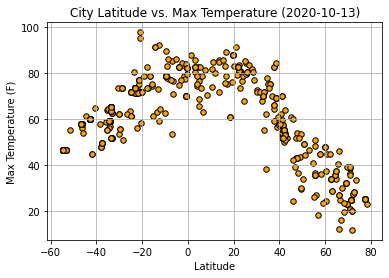

In [55]:
#scatter plot
city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({dt})')
plt.grid()
plt.savefig('my_images/City Latitude vs Max Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

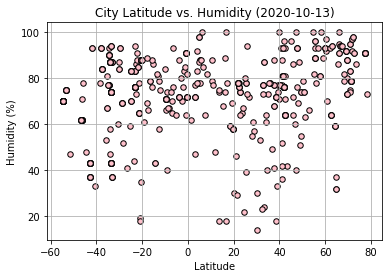

In [56]:
#scatter plot
city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({dt})')
plt.grid()
plt.savefig('my_images/City Latitude vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

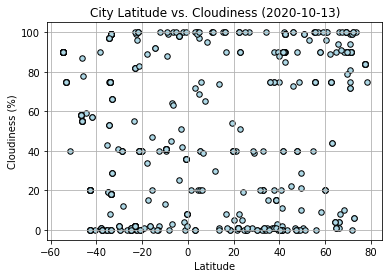

In [57]:
#scatter plot
city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({dt})')
plt.grid()
plt.savefig('my_images/City Latitude vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

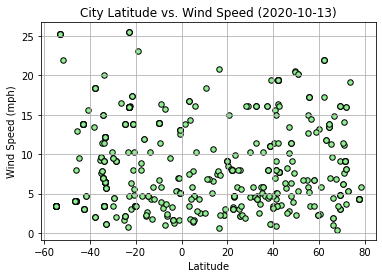

In [58]:
#scatter plot
city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({dt})')
plt.grid()
plt.savefig('my_images/City Latitude vs Wind Speed.png')
plt.show()

## Linear Regression

In [61]:
# sepearate the df to north and south
north_city_df = city_df.loc[city_df['Lat']>=0]
sorth_city_df = city_df.loc[city_df['Lat']<0]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9089945011194057


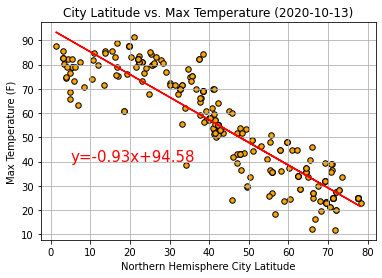

In [62]:
#scatter plot and linear regression
north_city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Max Temperature (F)')
x_values=north_city_df['Lat']
y_values=north_city_df['Max Temp']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(5,40),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title(f'City Latitude vs. Max Temperature ({dt})')
print(f'The r-value is: {r}')
plt.grid()
plt.show()


####  Colusion: Cities of northern hemisphere at the greater latitudes show lower max temperatures

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8324431871259677


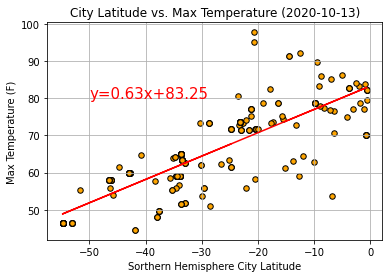

In [66]:
#scatter plot and linear regression
sorth_city_df.plot.scatter('Lat','Max Temp',color='orange',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Max Temperature (F)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Max Temp']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-50,80),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title(f'City Latitude vs. Max Temperature ({dt})')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: Cities of southern hemisphere at the greater latitudes show higher max temperatures

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2928008118359774


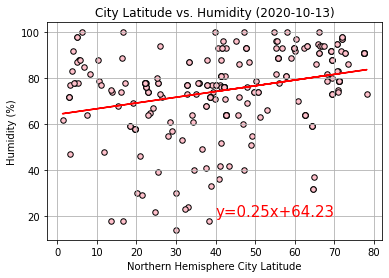

In [69]:
#scatter plot and linear regression
north_city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Humidity (%)')
x_values=north_city_df['Lat']
y_values=north_city_df['Humidity']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(40,20),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title(f'City Latitude vs. Humidity ({dt})')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and humidity

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24313443498672457


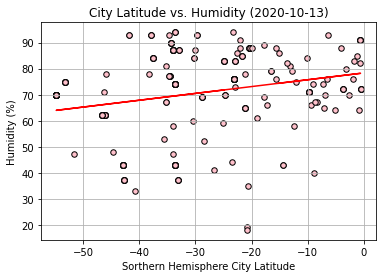

In [71]:
#scatter plot and linear regression
sorth_city_df.plot.scatter('Lat','Humidity',color='pink',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Humidity (%)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Humidity']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-37,10),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title(f'City Latitude vs. Humidity ({dt})')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and humidity

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2601258632330715


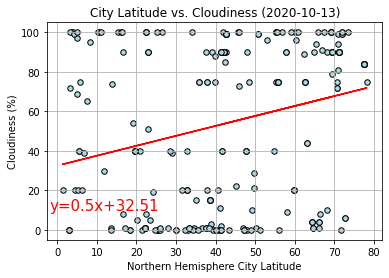

In [72]:
#scatter plot and linear regression
north_city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Cloudiness (%)')
x_values=north_city_df['Lat']
y_values=north_city_df['Cloudiness']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-2,10),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title(f'City Latitude vs. Cloudiness ({dt})')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and cloudiness

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.22945229543218246


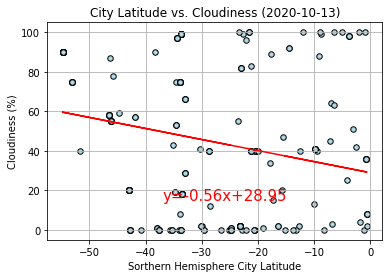

In [73]:
#scatter plot and linear regression
sorth_city_df.plot.scatter('Lat','Cloudiness',color='lightblue',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Cloudiness (%)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Cloudiness']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-37,15),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title(f'City Latitude vs. Cloudiness ({dt})')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and cloudiness

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09854384515599526


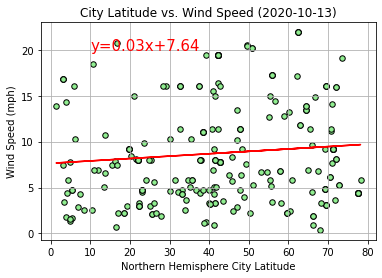

In [74]:
#scatter plot and linear regression
north_city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Northern Hemisphere City Latitude')
plt.ylabel('Wind Speed (mph)')
x_values=north_city_df['Lat']
y_values=north_city_df['Wind Speed']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(10,20),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title(f'City Latitude vs. Wind Speed ({dt})')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and wind speed

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005393051483333407


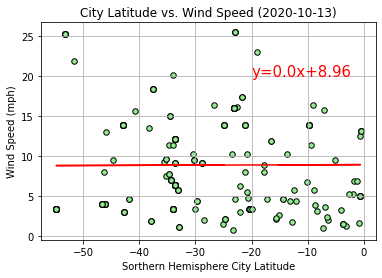

In [76]:
#scatter plot and linear regression
sorth_city_df.plot.scatter('Lat','Wind Speed',color='lightgreen',edgecolor='black',s=30)
plt.xlabel('Sorthern Hemisphere City Latitude')
plt.ylabel('Wind Speed (mph)')
x_values=sorth_city_df['Lat']
y_values=sorth_city_df['Wind Speed']
(m,b,r,p,sem)=linregress(x_values,y_values)
regress_values = x_values*m+b
line_equ = f'y={round(m,2)}x+{round(b,2)}'
plt.annotate(line_equ,(-20,20),fontsize = 15,c='red')
plt.plot(x_values,regress_values,'r-')
plt.title(f'City Latitude vs. Wind Speed ({dt})')
print(f'The r-value is: {r}')
plt.grid()
plt.show()

####  Colusion: poor correlation between city  latitude and wind speed